In [1]:
"""
Technical Indicators for Stock Market 
"""

'\nTechnical Indicators for Stock Market \n'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

import yfinance as yf
plt.style.use('fivethirtyeight')

In [14]:
START = '2019-01-01'
TODAY = date.today().strftime("%Y-%m-%d")

selected_stocks = "AAPL"

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data(selected_stocks)
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.382229,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.559078,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.034370,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.954170,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.639565,164101200


In [15]:
df = data.set_index(pd.DatetimeIndex(data['Date']).values)
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.382229,148158800
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.559078,365248800
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.034370,234428400
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.954170,219111200
2019-01-08,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.639565,164101200
...,...,...,...,...,...,...,...
2021-08-02,2021-08-02,146.360001,146.949997,145.250000,145.520004,145.302307,62880000
2021-08-03,2021-08-03,145.809998,148.039993,145.179993,147.360001,147.139542,64786600
2021-08-04,2021-08-04,147.270004,147.789993,146.279999,146.949997,146.730164,56368300
2021-08-05,2021-08-05,146.979996,147.839996,146.169998,147.059998,146.839996,46397700


In [16]:
# Simple Moving Average (SMA)
def generate_SMA(data, period = 30, column = 'Close'):
    return data[column].rolling(window = period).mean()

# Exponential Moving Average (EMA)
def generate_EMA(data, period = 20, column = 'Close'):
    return data[column].ewm(span = period, adjust = False).mean()

# Moving Average Convergence / Divergence (MACD)
def generate_MACD(data, period_long = 26, period_short = 12, period_signal = 9, column = 'Close'):
    
    # Short term EMA
    short_EMA = generate_EMA(data, period_short, column)

    # Long term EMA
    long_EMA = generate_EMA(data, period_long, column)

    data['MACD'] = short_EMA - long_EMA

    data['Signal_Line'] = generate_EMA(data, period_signal, "MACD")

    return data

In [28]:
# Relative Strength Index (RSI) 
def generate_RSI(data, period = 14, column = 'Close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    
    up = delta.copy()
    down = delta.copy()

    up[ up < 0] = 0
    down[ down > 0] = 0

    data['up'] = up
    data['down'] = down

    AVG_gain = generate_SMA(data, period, 'up')
    AVG_loss = abs(generate_SMA(data, period, 'down'))

    RSI = 100.0 - (100.0 / (1.0 + (AVG_gain / AVG_loss)))

    data['RSI'] = RSI

    return data

In [29]:
df = generate_MACD(df)
df = generate_RSI(df)

df['SMA'] = generate_SMA(df)
df['EMA'] = generate_EMA(df)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.382229,148158800,0.000000,0.000000,NaN,NaN,NaN,NaN,39.480000
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.559078,365248800,-0.313704,-0.062741,0.000000,-3.932499,NaN,NaN,39.105476
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.034370,234428400,-0.434854,-0.137163,1.517498,0.000000,NaN,NaN,38.911145
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.954170,219111200,-0.531398,-0.216010,0.000000,-0.082500,NaN,NaN,38.727464
2019-01-08,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.639565,164101200,-0.544742,-0.281757,0.705002,0.000000,NaN,NaN,38.628420


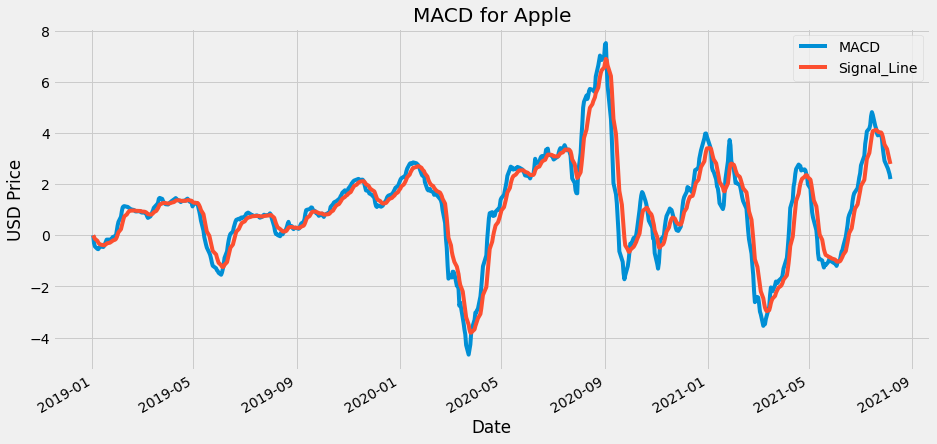

In [30]:
req_columns = ['MACD', 'Signal_Line', ]
df[req_columns].plot(figsize = (14, 7))
plt.title('MACD for Apple')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

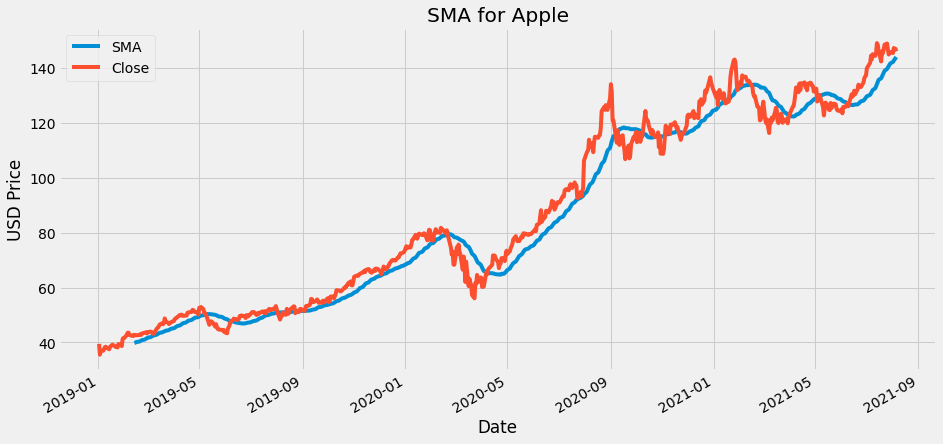

In [31]:
req_columns = ['SMA', 'Close']
df[req_columns].plot(figsize = (14, 7))
plt.title('SMA for Apple')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

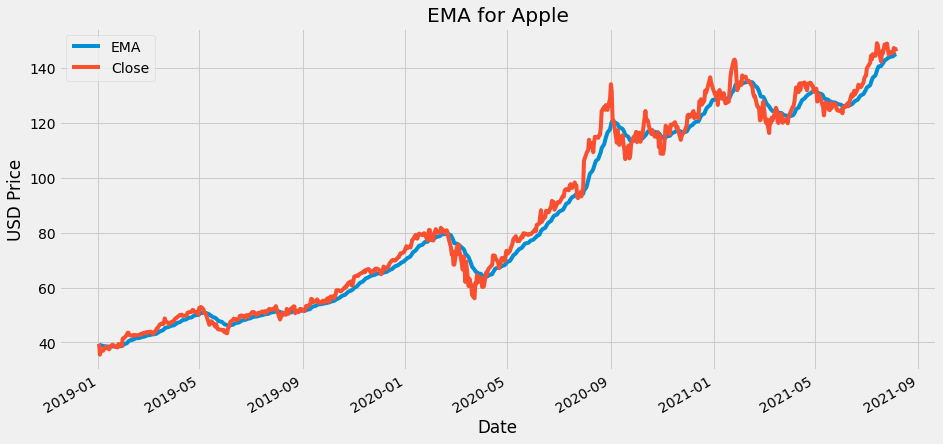

In [32]:
req_columns = ['EMA', 'Close']
df[req_columns].plot(figsize = (14, 7))
plt.title('EMA for Apple')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

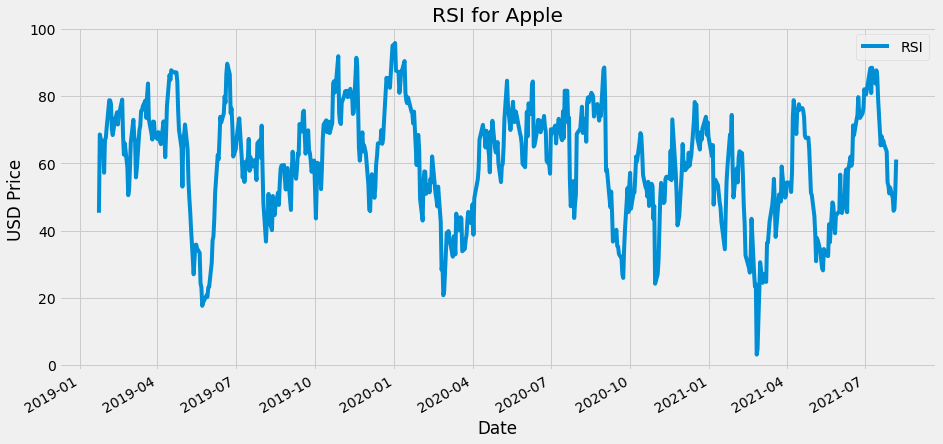

In [33]:
req_columns = ['RSI']
df[req_columns].plot(figsize = (14, 7))
plt.title('RSI for Apple')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()